### Imports

In [1]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

### Ouverture du fichier résultats

In [2]:
results = joblib.load("results.joblib")

### Analyse

Pour chaque langue, quels sont les modèles les plus performants sur le fichier de meilleur qualité ?

In [3]:
colors = {"fr": "blue", "en": "green", "es": "red", "de": "purple"}

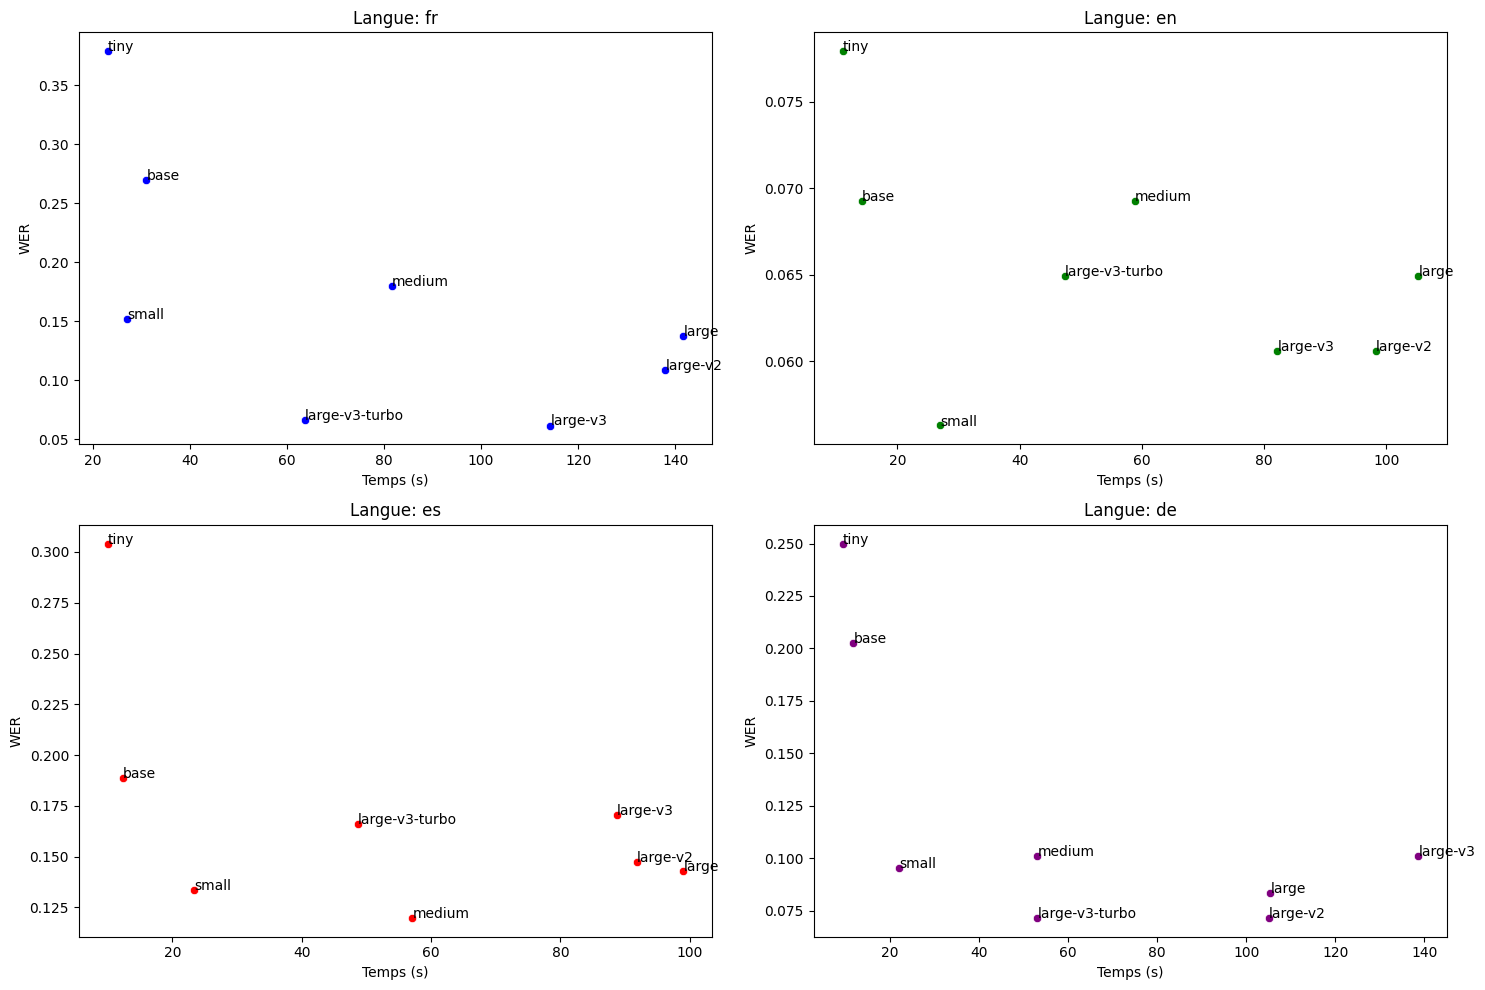

In [4]:
fig, axes = plt.subplots(nrows=(len(results) + 1) // 2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for idx, lang in enumerate(results):
    x_vals, y_vals, labels = [], [], []
    for model in results[lang]:
        for fic_ in results[lang][model]:
            if "_0_" in fic_.name:
                x_vals.append(results[lang][model][fic_]["time_s"])
                y_vals.append(results[lang][model][fic_]["wer"])
                labels.append(model.split("-", maxsplit=1)[1])
    ax = axes[idx]
    sns.scatterplot(x=x_vals, y=y_vals, ax=ax, color=colors.get(lang, "black"))
    for i, lbl in enumerate(labels):
        ax.annotate(lbl, (x_vals[i], y_vals[i]))
    ax.set_xlabel("Temps (s)")
    ax.set_ylabel("WER")
    ax.set_title(f"Langue: {lang}")

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Conclusion de ces deux premières séries de graphiques : sur un fichier audio qualitatif, en anglais, le modèle small est le meilleur.

### Etude des audios dégradés

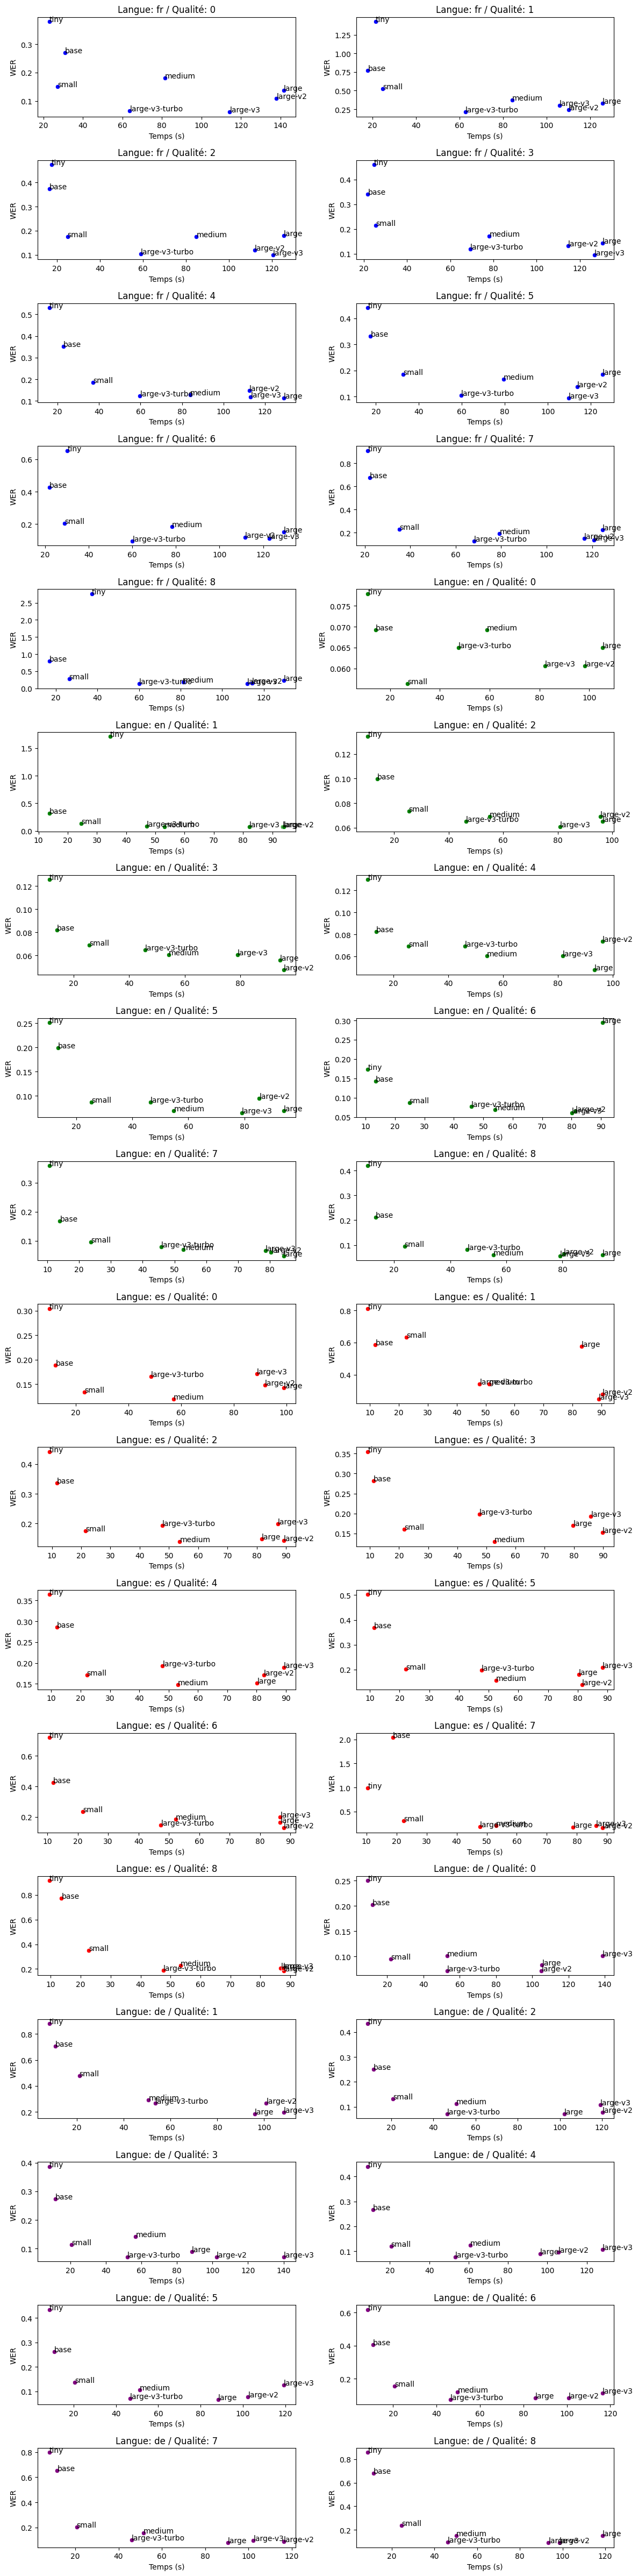

In [5]:
fig, axes = plt.subplots(nrows=18, ncols=2, figsize=(12, 48))
axes = axes.flatten()
plot_idx = 0

for lang in results:
    for qualite in range(9):
        x_vals, y_vals, labels = [], [], []
        for model in results[lang]:
            for fic in results[lang][model]:
                if f"_{qualite}_" in fic.name:
                    x_vals.append(results[lang][model][fic]["time_s"])
                    y_vals.append(results[lang][model][fic]["wer"])
                    labels.append(model.split("-", maxsplit=1)[1])
        ax = axes[plot_idx]
        sns.scatterplot(x=x_vals, y=y_vals, ax=ax, color=colors.get(lang, "black"))
        for i, lbl in enumerate(labels):
            ax.annotate(lbl, (x_vals[i], y_vals[i]))
        ax.set_xlabel("Temps (s)")
        ax.set_ylabel("WER")
        ax.set_title(f"Langue: {lang} / Qualité: {qualite}")
        plot_idx += 1

plt.tight_layout()
plt.show()

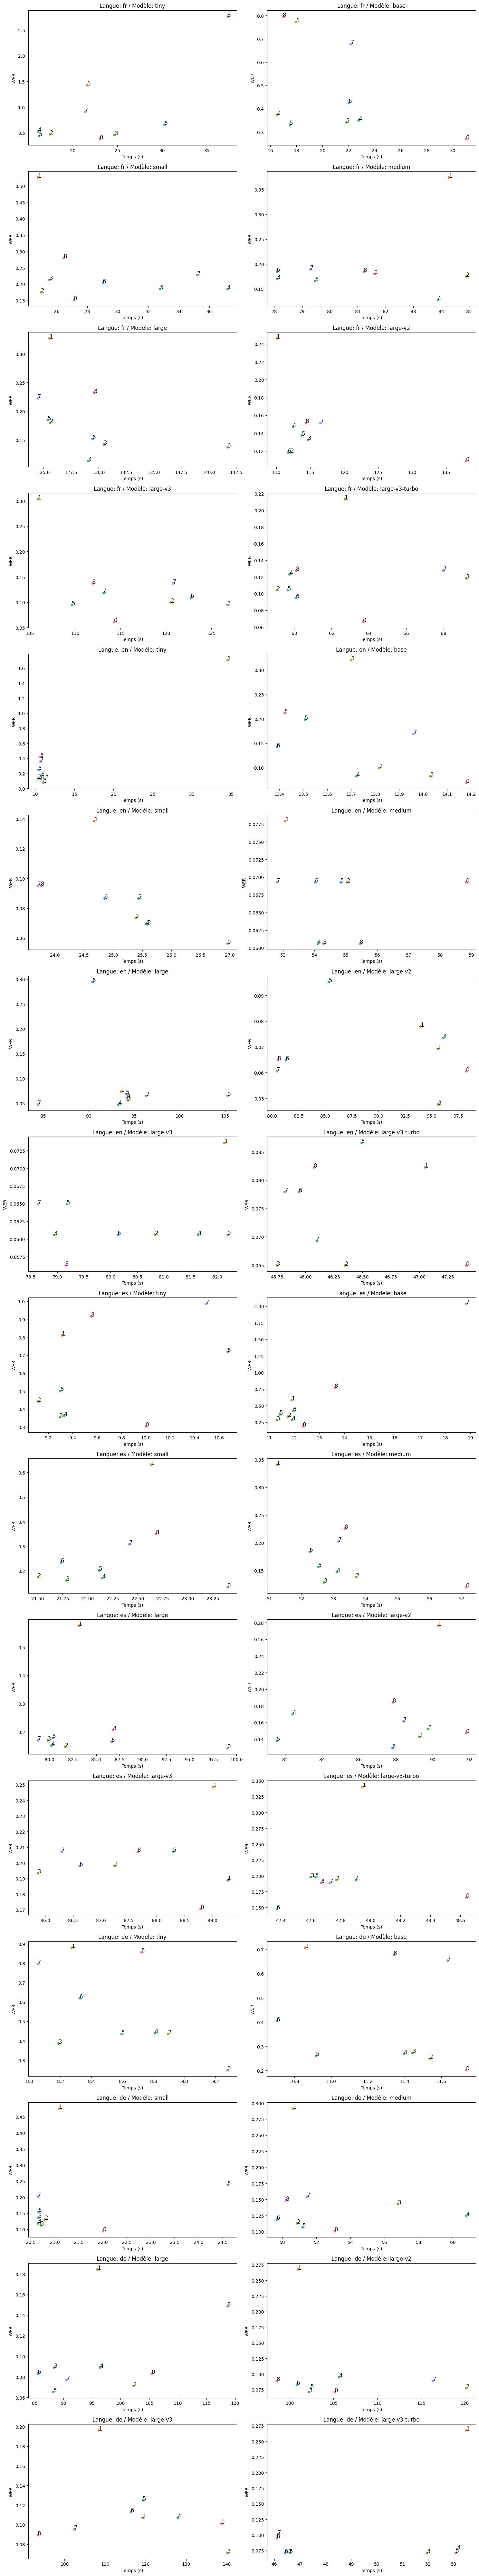

In [6]:
qualite_colors = sns.color_palette(
    "husl", 9
)  # Generate 9 distinct colors for qualities

# Count the total number of models
total_models = sum(len(results[lang]) for lang in results)

fig, axes = plt.subplots(
    nrows=(total_models + 1) // 2, ncols=2, figsize=(15, 5 * ((total_models + 1) // 2))
)
axes = axes.flatten()

plot_idx = 0
for lang in results:
    for model in results[lang]:
        x_vals, y_vals, labels, qualites = [], [], [], []
        for fic in results[lang][model]:
            qualite = int(fic.name.split("_")[1])
            x_vals.append(results[lang][model][fic]["time_s"])
            y_vals.append(results[lang][model][fic]["wer"])
            labels.append(qualite)
            qualites.append(qualite)
        ax = axes[plot_idx]
        for qualite in range(9):
            q_x_vals = [x for x, q in zip(x_vals, qualites) if q == qualite]
            q_y_vals = [y for y, q in zip(y_vals, qualites) if q == qualite]
            q_labels = [lbl for lbl, q in zip(labels, qualites) if q == qualite]
            sns.scatterplot(
                x=q_x_vals,
                y=q_y_vals,
                ax=ax,
                color=qualite_colors[qualite],
            )
            for i, lbl in enumerate(q_labels):
                ax.annotate(
                    lbl, (q_x_vals[i], q_y_vals[i]), fontsize=12
                )  # Increase fontsize here
        ax.set_xlabel("Temps (s)")
        ax.set_ylabel("WER")
        ax.set_title(f"Langue: {lang} / Modèle: {model.split('-', maxsplit=1)[1]}")
        # ax.legend()
        plot_idx += 1

# Hide any unused subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()